# Data Preprocessing

scanpy tutorial: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [2]:
!pip install scanpy
!pip install anndata
!pip install leidenalg
!pip install louvain
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install shap pdpbox
!pip install tf-keras-vis
!pip install -U cellxgene-census

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cellxgene_census

In [ ]:
with cellxgene_census.open_soma() as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "disease in ['Alzheimer disease']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease", "dataset_id"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.


            assay               cell_type                   tissue  \
0       10x 3' v2  mature microglial cell   superior frontal gyrus   
1       10x 3' v2  mature microglial cell   superior frontal gyrus   
2       10x 3' v2  mature microglial cell   superior frontal gyrus   
3       10x 3' v2  mature microglial cell   superior frontal gyrus   
4       10x 3' v2  mature microglial cell   superior frontal gyrus   
...           ...                     ...                      ...   
936165  10x 3' v2        GABAergic neuron   Brodmann (1909) area 9   
936166  10x 3' v3        GABAergic neuron  Brodmann (1909) area 17   
936167  10x 3' v3        GABAergic neuron   Brodmann (1909) area 9   
936168  10x 3' v3        GABAergic neuron   Brodmann (1909) area 9   
936169   Drop-seq        GABAergic neuron   Brodmann (1909) area 9   

       tissue_general suspension_type            disease  \
0               brain         nucleus  Alzheimer disease   
1               brain         nucleus  

In [ ]:
# pull out the unique dataset ids
unique_ids = cell_metadata['dataset_id'].unique()
print(unique_ids)

['bdacc907-7c26-419f-8808-969eab3ca2e8', '9f1049ac-f8b7-45ad-8e31-6e96c3e5058f', '06b91002-4d3d-4d2e-8484-20c3b31e232c', 'b94e3bdf-a385-49cc-b312-7a63cc28b77a', 'f9ad5649-f372-43e1-a3a8-423383e5a8a2', ..., '0ecea697-0f69-4d40-88e1-7f854e17e2b3', '85c60876-7f35-40c5-a256-7808d84c6ba5', '215ede73-4f67-4a72-b77e-9c3b077b6dfc', 'ac0c6561-7a48-4185-af6f-af799f699172', 'cff99df2-4904-44f7-9173-ff837f95606e']
Length: 24
Categories (893, object): ['0041b9c3-6a49-4bf7-8514-9bc7190067a7', '00476f9f-ebc1-4b72-b541-32f912ce36ea',
                           '00593d17-0693-4646-acad-89dbefba11bb', '0087cde2-967d-4f7c-8e6e-40e4c9ad1891', ...,
                           'ff45e623-7f5f-46e3-b47d-56be0341f66b', 'ff4cfa86-9c0c-4b7c-abd6-90547657d04f',
                           'ff7d15fa-f4b6-4a0e-992e-fd0c9d088ded', 'ff995299-bf56-4d11-914d-b77949f02fb1']


In [ ]:
# just to confirm data source on cellxgene website
print(cell_metadata.size)

6553190


In [ ]:
import pandas as pd

# assume your DataFrame is called df

# group by dataset_id and collect unique cell types
cell_type_lists = (
    cell_metadata
    .groupby('dataset_id')['cell_type']
    .unique()
    .apply(lambda arr: sorted(arr))
)

# display for each dataset_id
for ds_id, cell_types in cell_type_lists.items():
  if len(cell_types) > 0:
    print(f"Dataset {ds_id!r} has {len(cell_types)} cell types:")
    for ct in cell_types:
        print(f"  - {ct}")
    print()


Dataset '06b91002-4d3d-4d2e-8484-20c3b31e232c' has 1 cell types:
  - mature astrocyte

Dataset '0a2d7e87-c3c0-4ed2-86df-ae18811fcc16' has 8 cell types:
  - astrocyte
  - endothelial cell
  - glutamatergic neuron
  - inhibitory interneuron
  - microglial cell
  - oligodendrocyte
  - oligodendrocyte precursor cell
  - vascular leptomeningeal cell

Dataset '0ecea697-0f69-4d40-88e1-7f854e17e2b3' has 1 cell types:
  - GABAergic neuron

Dataset '1492eb6b-7d50-4c4d-94ac-c801a7d5555c' has 1 cell types:
  - GABAergic neuron

Dataset '15e0ec3e-a05f-4cd8-8624-96448f5a2b58' has 1 cell types:
  - oligodendrocyte

Dataset '215ede73-4f67-4a72-b77e-9c3b077b6dfc' has 1 cell types:
  - glutamatergic neuron

Dataset '24066994-8183-488d-b037-ef6bb524af39' has 1 cell types:
  - oligodendrocyte

Dataset '2727d83a-0af0-443a-bff8-58dc7028289a' has 7 cell types:
  - GABAergic neuron
  - endothelial cell
  - glutamatergic neuron
  - mature astrocyte
  - mature microglial cell
  - oligodendrocyte
  - oligodendro

<ipython-input-5-e1f5293354da>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('dataset_id')['cell_type']


In [ ]:
import numpy as np
import tiledbsoma
import cellxgene_census

# pull out the unique ids as plain Python strings
ids_clause = ",".join(f"'{ds}'" for ds in unique_ids)

# 1) your big obs-filter
value_filter = (
    "disease in ['Alzheimer disease', 'normal'] "
    f"and dataset_id in [{ids_clause}]"
)
k = 80000

# STEP 1: get all soma_joinids matching your filter
with cellxgene_census.open_soma(census_version="2025-01-30") as census:
    human = census["census_data"]["homo_sapiens"]
    aq = tiledbsoma.AxisQuery(value_filter=value_filter)
    query = human.axis_query(measurement_name="RNA", obs_query=aq)
    all_ids = query.obs_joinids().to_pylist()
    query.close()

all_ids = np.array(all_ids, dtype=str)
if len(all_ids) > k:
    sampled_ids = list(np.random.choice(all_ids, size=k, replace=False))
else:
    sampled_ids = list(all_ids)

# … after your STEP 1 sampling logic …
# sampled_ids is currently a list of str; convert to int:
sampled_ids_int = [int(x) for x in sampled_ids]

# STEP 2: re-fetch into AnnData
with cellxgene_census.open_soma(census_version="2025-01-30") as census:
    adata = cellxgene_census.get_anndata(
        census=census,
        organism="Homo sapiens",
        obs_coords=sampled_ids_int,
        obs_column_names=["assay","cell_type","tissue","tissue_general",
                          "suspension_type","disease","sex","dataset_id"],
        var_column_names=["feature_name","feature_id","feature_type"],
    )

print(adata)



AnnData object with n_obs × n_vars = 80000 × 61888
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex', 'dataset_id'
    var: 'feature_name', 'feature_id', 'feature_type'


In [ ]:
query.close()

## Updating Gene and Cell Names
#### - changing genes to gene ids
#### - mapping cell type names to more general labels


In [ ]:
# reset variable names from 0,1,2....
adata.var.set_index("feature_name", inplace=True)
print("new var_names:", adata.var_names[:10])


new var_names: Index(['LINC01409', 'NOC2L', 'PERM1', 'ENSG00000272512.1', 'HES4', 'ISG15',
       'AGRN', 'RNF223', 'C1orf159', 'TNFRSF18'],
      dtype='object', name='feature_name')


In [ ]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [ ]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

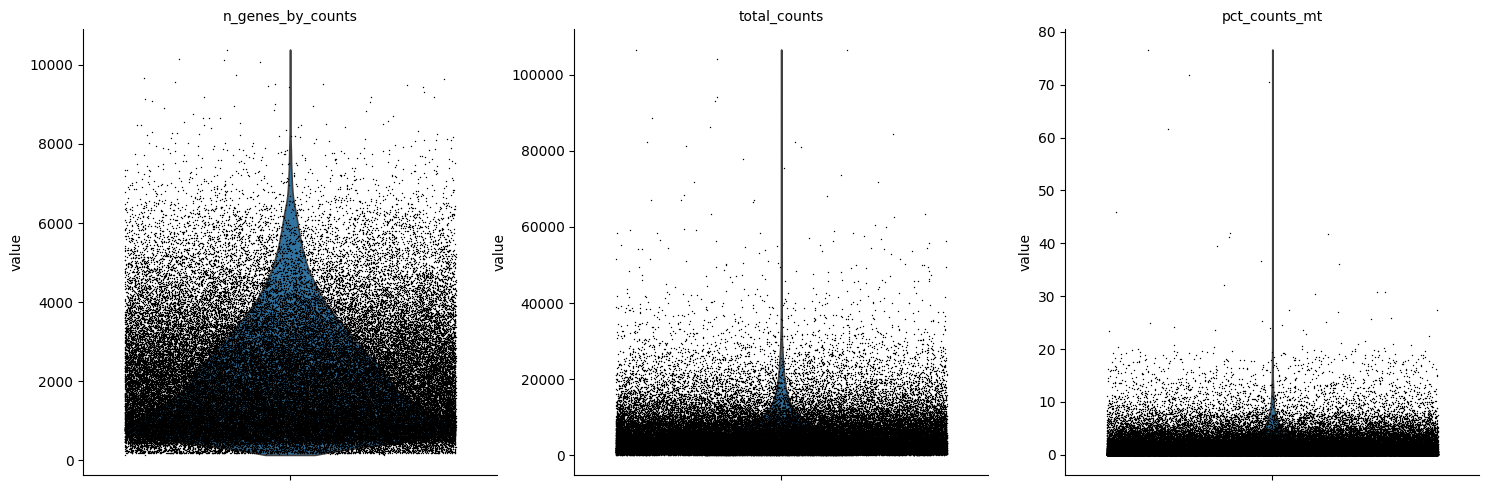

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
# should edit this based on how vln plots look before
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_cells(adata, max_counts=60000)
sc.pp.filter_cells(adata, min_counts = 100)
sc.pp.filter_genes(adata, min_cells=5)
# filter mito
adata = adata[adata.obs.pct_counts_mt < 15, :]



# Normalization

In [ ]:
# Saving count data
adata.layers["counts"] = adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

<ipython-input-12-b8c758cef1f2>:2: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()


# Feature Selection

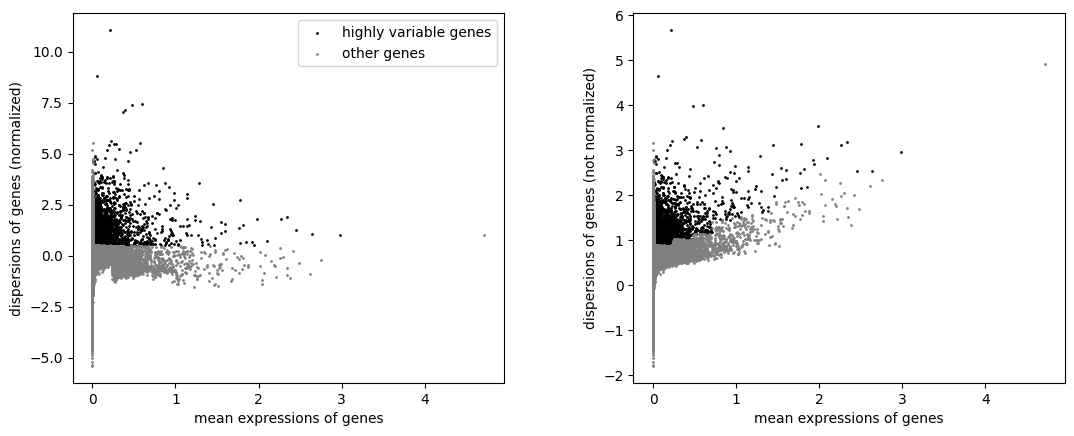

In [ ]:
sc.pp.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

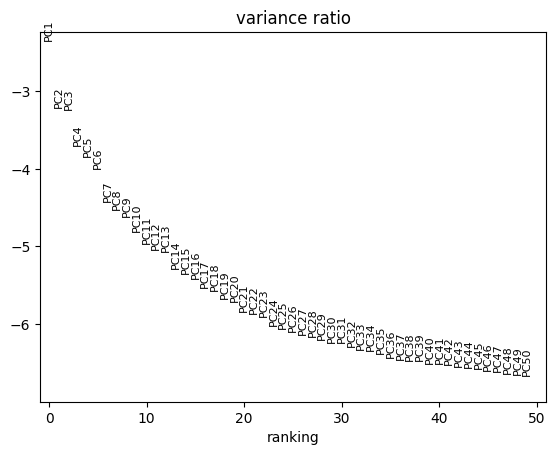

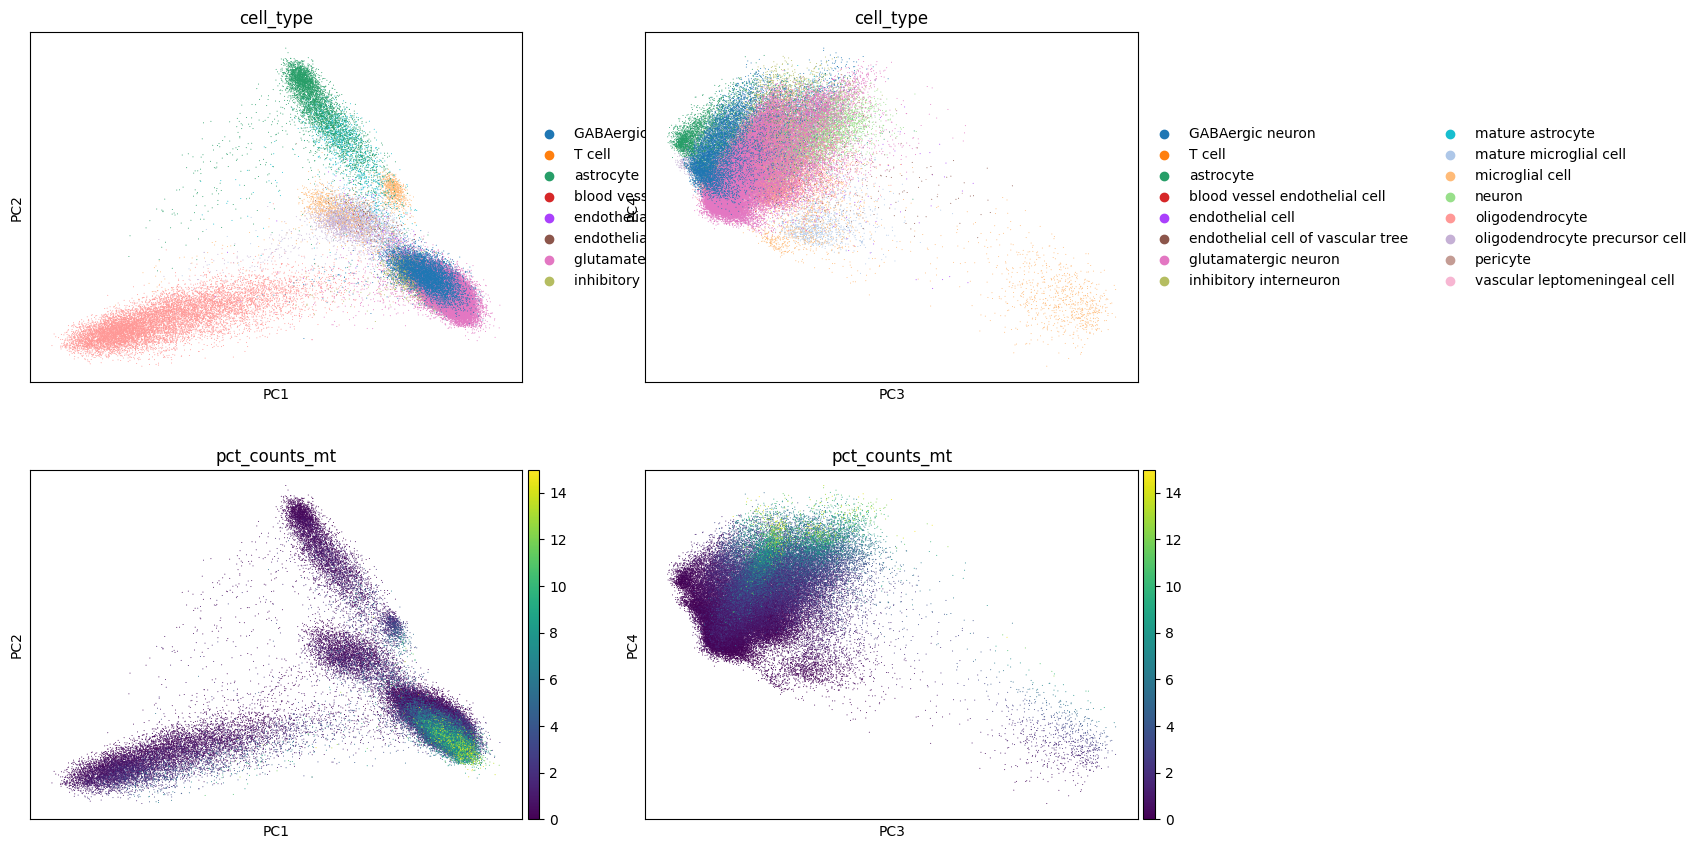

In [ ]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
sc.pl.pca(
    adata,
    color=["cell_type", "cell_type", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)


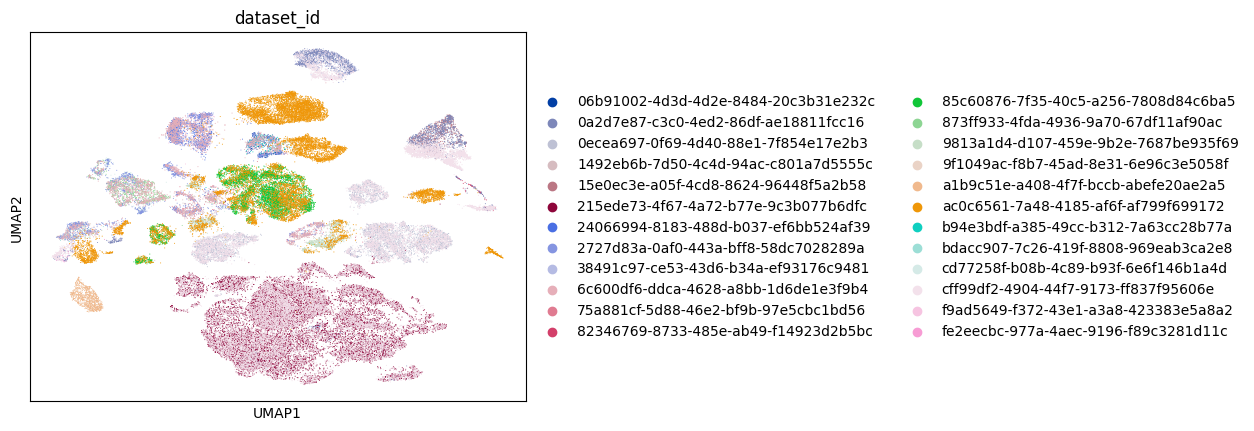

In [ ]:
sc.pl.umap(
    adata,
    color="dataset_id",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [ ]:
pd.crosstab(adata.obs['dataset_id'], adata.obs['cell_type'])

cell_type,GABAergic neuron,T cell,astrocyte,blood vessel endothelial cell,endothelial cell,endothelial cell of vascular tree,glutamatergic neuron,inhibitory interneuron,mature astrocyte,mature microglial cell,microglial cell,neuron,oligodendrocyte,oligodendrocyte precursor cell,pericyte,vascular leptomeningeal cell
dataset_id,,,,,,,,,,,,,,,,
06b91002-4d3d-4d2e-8484-20c3b31e232c,0,0,0,0,0,0,0,0,338,0,0,0,0,0,0,0
0a2d7e87-c3c0-4ed2-86df-ae18811fcc16,0,0,898,0,24,0,284,113,0,0,55,0,907,111,0,58
0ecea697-0f69-4d40-88e1-7f854e17e2b3,4433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1492eb6b-7d50-4c4d-94ac-c801a7d5555c,468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15e0ec3e-a05f-4cd8-8624-96448f5a2b58,0,0,0,0,0,0,0,0,0,0,0,0,838,0,0,0
215ede73-4f67-4a72-b77e-9c3b077b6dfc,0,0,0,0,0,0,16173,0,0,0,0,0,0,0,0,0
24066994-8183-488d-b037-ef6bb524af39,0,0,0,0,0,0,0,0,0,0,0,0,893,0,0,0
2727d83a-0af0-443a-bff8-58dc7028289a,300,0,0,0,47,0,624,0,330,360,0,0,560,260,0,0
38491c97-ce53-43d6-b34a-ef93176c9481,0,0,814,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# print out all unique adata.obs['cell_type'] so that each one shows
print(adata.obs['cell_type'].unique())



['mature microglial cell', 'mature astrocyte', 'oligodendrocyte', 'GABAergic neuron', 'microglial cell', ..., 'vascular leptomeningeal cell', 'neuron', 'endothelial cell of vascular tree', 'pericyte', 'blood vessel endothelial cell']
Length: 16
Categories (16, object): ['GABAergic neuron', 'T cell', 'astrocyte', 'blood vessel endothelial cell', ...,
                          'oligodendrocyte', 'oligodendrocyte precursor cell', 'pericyte',
                          'vascular leptomeningeal cell']


### MAP CELL TYPES

In [ ]:

coarse_map = {
    # Astrocytes
    "astrocyte":               "astrocyte",
    "mature astrocyte":        "astrocyte",
    # Microglia
    "microglial cell":         "microglia",
    "mature microglial cell":  "microglia",
    # Endothelial
    "blood vessel endothelial cell":     "endothelial cell",
    "endothelial cell":                  "endothelial cell",
    "endothelial cell of vascular tree": "endothelial cell",
    # Oligodendrocytes
    "oligodendrocyte":                "oligodendrocyte",
    "oligodendrocyte precursor cell": "oligodendrocyte precursor cell",
    # Neurons
    "GABAergic neuron":         "neuron",
    "glutamatergic neuron":     "neuron",
    "inhibitory interneuron":   "neuron",
    "neuron":                   "neuron",
    # Immune
    "T cell":                   "T cell",
    # Vascular support
    "pericyte":                   "perivascular cell",
    "vascular leptomeningeal cell":"perivascular cell"
}

# 2) Apply it to your AnnData
adata.obs["cell_type"] = (
    adata.obs["cell_type"]
            .map(coarse_map)
            .fillna("other")   # anything not in the map
)


In [ ]:
#table of how many cells in each cell type
adata.obs['cell_type'].value_counts()

,count
cell_type,
neuron,57232
oligodendrocyte,11235
astrocyte,5936
microglia,2954
oligodendrocyte precursor cell,1830
endothelial cell,339
perivascular cell,121
T cell,10


In [ ]:
# remove all T cells from adata because theres so few
adata = adata[adata.obs['cell_type'] != 'T cell', :]
adata.obs['cell_type'].value_counts()

,count
cell_type,
neuron,57232
oligodendrocyte,11235
astrocyte,5936
microglia,2954
oligodendrocyte precursor cell,1830
endothelial cell,339
perivascular cell,121


In [ ]:
import gc
gc.collect()

86505

In [ ]:
import textwrap

# 1) wrap your cell_type labels at ~15 chars
#    build a mapping from original → wrapped string
orig = adata.obs['cell_type'].astype(str).unique()
wrapped_map = {
    c: "\n".join(textwrap.wrap(c, 15))
    for c in orig
}

# apply it and make a Categorical
adata.obs['cell_type_wrap'] = adata.obs['cell_type'].map(wrapped_map).astype('category')

# now reorder the categories to match the original order
new_cats = [wrapped_map[c] for c in orig]
adata.obs['cell_type_wrap'] = adata.obs['cell_type_wrap'].cat.reorder_categories(new_cats)

# 2) define custom palettes
sex_palette     = {'female': 'orange', 'male': 'purple'}
disease_palette = {'normal': '#4DAF4A', 'Alzheimer disease': '#E41A1C'}

# 3) plot side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# — panel 1: wrapped cell types
sc.pl.umap(
    adata,
    color='cell_type_wrap',
    ax=axes[0],
    show=False,
    size=2,
    legend_loc='right margin',
)
axes[0].set_title('Cell type')

# — panel 2: sex
sc.pl.umap(
    adata,
    color='sex',
    ax=axes[1],
    show=False,
    size=2,
    palette=sex_palette,
    legend_loc='right margin',
)
axes[1].set_title('Sex')

# — panel 3: disease
sc.pl.umap(
    adata,
    color='disease',
    ax=axes[2],
    show=False,
    size=2,
    palette=disease_palette,
    legend_loc='right margin',
)
axes[2].set_title('Disease')

# after making your 3-panel plot...
plt.subplots_adjust(wspace=.95, right=.85)  # keep your original margins



In [ ]:
# save
from google.colab import drive
drive.mount('/content/drive')
dst = '/content/drive/MyDrive/adata_alzheimers_80k_processed.h5ad'
adata.write(dst)
print("Saved to Drive via Colab mount:", dst)

# Data Splitting

In [4]:
#!pip install --quiet gdown

import gdown
file_id = "18fLXlcGCAxy_aRrriCwLBTmVlOgu3GDM"
url     = f"https://drive.google.com/uc?id={file_id}"

# Download it into the Colab VM:
output = "adata_alzheimers_80k.h5ad"
gdown.download(url, output, quiet=False)

adata = ad.read_h5ad(output)
adata

Downloading...
From (original): https://drive.google.com/uc?id=18fLXlcGCAxy_aRrriCwLBTmVlOgu3GDM
From (redirected): https://drive.google.com/uc?id=18fLXlcGCAxy_aRrriCwLBTmVlOgu3GDM&confirm=t&uuid=4b5e3c46-a11b-4e38-b632-bd3873e6a341
To: /content/adata_alzheimers_80k.h5ad
100%|██████████| 2.71G/2.71G [00:16<00:00, 165MB/s]


AnnData object with n_obs × n_vars = 79647 × 36092
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts'
    var: 'feature_id', 'feature_type', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'dataset_id_colors', 'disease_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'sex_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Use highly variable genes only
adata_hvg = adata[:, adata.var['highly_variable']]

# Make feature dataframe
X = pd.DataFrame(adata_hvg.X.toarray(), columns=adata_hvg.var_names, index=adata_hvg.obs_names)

# Add 'sex' as a feature
X['sex'] = adata_hvg.obs['sex'].values

# Encode 'sex' as numeric
X['sex'] = LabelEncoder().fit_transform(X['sex'])

# Define target
y = adata_hvg.obs['disease']

# Encode target (binary classification: Parkinson's disease vs normal)
y = LabelEncoder().fit_transform(y)

In [ ]:
sex_disease_counts = pd.crosstab(adata_hvg.obs['disease'], adata_hvg.obs['sex'])

print(sex_disease_counts)

sex                female   male
disease                         
Alzheimer disease   28649  24640
normal               7570  18798


In [ ]:
y

array([1, 1, 1, ..., 0, 0, 1])

# Random Forest

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, f1_score
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Combine features, target, and metadata into one DataFrame
df = X.copy()
y = pd.Series(y, index=X.index, name="disease")
df['target']     = y
df['cell_type']  = adata_hvg.obs['cell_type'].values

sex_labels = {0: 'female', 1: 'male'}

# Prepare a place to store results
results = {}
clfs = {}

# Loop over cell types
for ct in df['cell_type'].unique():
  if ct != "microglia":
    print(f"\n=== Cell type: {ct} ===")
    df_ct = df[df['cell_type'] == ct]
    clfs[ct] = {'female': [], 'male': []}
    results[ct] = {}

    # for average accuracy, AUROC, precision, recall, sensitivity, and specificity
    avg_accuracy = 0
    avg_auroc = 0
    avg_precision = 0
    avg_recall = 0
    avg_sensitivity = 0
    avg_f1 = 0

    # For each sex within this cell type
    for sex_value, sex_name in sex_labels.items():
        print(f"-- sex = {sex_name}")
        feature_counts = Counter()
        df_sex = df_ct[df_ct['sex'] == sex_value]
        print(df_sex['target'].nunique())
        # skip if too few samples
        if df_sex['target'].nunique() < 2 or len(df_sex) < 20:
            print(f"   skipping {sex_name} (n={len(df_sex)}, classes={df_sex['target'].unique()})")
            continue

        # 100 random iterations
        for i in tqdm(range(100)):
            # balance disease vs control
            g0 = df_sex[df_sex['target'] == 0]
            g1 = df_sex[df_sex['target'] == 1]
            n   = min(len(g0), len(g1))
            bal = pd.concat([
                g0.sample(n=n, random_state=i),
                g1.sample(n=n, random_state=i)
            ])

            # split out features / label
            X_bal = bal.drop(columns=['target','sex','cell_type'])
            y_bal = bal['target']

            X_tr, X_te, y_tr, y_te = train_test_split(
                X_bal, y_bal,
                test_size=0.2,
                random_state=i,
                stratify=y_bal
            )

            clf = RandomForestClassifier(n_estimators=500, random_state=i)
            clf.fit(X_tr, y_tr)
            clfs[ct][sex_name].append(clf)

            y_pred = clf.predict(X_te)
            y_prob = clf.predict_proba(X_te)[:, 1]
            avg_auroc += roc_auc_score(y_te, y_prob)
            avg_precision += precision_score(y_te, y_pred)
            avg_recall += recall_score(y_te, y_pred) # Same as specificity
            confusion = confusion_matrix(y_te, y_pred)
            # Sensitivity = true positive / (true positive + false negative)
            sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
            avg_accuracy +=  accuracy_score(y_te, y_pred)
            avg_sensitivity += sensitivity
            avg_f1 += f1_score(y_te, y_pred)

            # record top-10 features this run
            imp    = clf.feature_importances_
            names  = X_tr.columns
            top10  = [names[j] for j in np.argsort(imp)[-10:]]
            feature_counts.update(top10)

        # build DataFrame of freq across 100 runs, keep top 100
        df_feat = (
            pd.DataFrame.from_dict(feature_counts, orient='index', columns=['count'])
              .sort_values('count', ascending=False)
              .head(100)
        )
        results[ct][sex_name] = df_feat
        avg_accuracy = avg_accuracy / 100
        avg_auroc = avg_auroc / 100
        avg_precision = avg_precision / 100
        avg_recall = avg_recall / 100
        avg_sensitivity = avg_sensitivity / 100
        avg_f1 = avg_f1 / 100

        print(f"\nAverage accuracy: {avg_accuracy:.3f}")
        print(f"\nAverage AUROC: {avg_auroc:.3f}")
        print(f"\nAverage precision: {avg_precision:.3f}")
        print(f"\nAverage recall: {avg_recall:.3f}")
        print(f"\nAverage sensitivity: {avg_sensitivity:.3f}")
        print(f"\nAverage f1: {avg_f1:.3f}")
        print("\n")



=== Cell type: microglia ===
-- sex = female
2


100%|██████████| 100/100 [02:02<00:00,  1.22s/it]



Average accuracy: 0.789

Average AUROC: 0.922

Average precision: 0.721

Average recall: 0.957

Average sensitivity: 0.620

Average specificity: 0.957

Average f1: 0.821


-- sex = male
2


100%|██████████| 100/100 [05:03<00:00,  3.04s/it]



Average accuracy: 0.864

Average AUROC: 0.928

Average precision: 0.823

Average recall: 0.932

Average sensitivity: 0.797

Average specificity: 0.932

Average f1: 0.874



=== Cell type: astrocyte ===
-- sex = female
2


100%|██████████| 100/100 [14:44<00:00,  8.84s/it]



Average accuracy: 0.909

Average AUROC: 0.963

Average precision: 0.937

Average recall: 0.878

Average sensitivity: 0.940

Average specificity: 0.878

Average f1: 0.906


-- sex = male
2


 17%|█▋        | 17/100 [05:43<27:57, 20.21s/it]


KeyboardInterrupt: 

In [ ]:
import pickle

# 2) Mount & copy to Drive (Colab)
try:
    from google.colab import drive
    drive.mount('/content/drive')
    dst = '/content/drive/MyDrive/rf_feature_counts.pkl'
    with open(dst, "wb") as f:
        pickle.dump(results, f)
    with open(dst, "wb") as f:
        pickle.dump(results, f)
except Exception as e:
    print("Drive mount failed:", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Also saved to Drive at /content/drive/MyDrive/rf_feature_counts.pkl
